In [68]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv('diabetes_dataset.csv')
df.shape
df.info()    
df.drop(['diabetes_risk_score','diabetes_stage'],inplace=True,axis=1)
df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,69.632870,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,8.371954,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,40.000000,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,64.000000,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,70.000000,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,75.000000,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,105.000000,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,1.000000


In [74]:

df['diagnosed_diabetes'].value_counts()

diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder #importando LabelEncoder
labelencoder = LabelEncoder()

df.head()

df['cat_gender'] = labelencoder.fit_transform(df['gender'])
df['cat_smoke'] = labelencoder.fit_transform(df['smoking_status'])

df.drop(['education_level','income_level','employment_status','ethnicity'],inplace=True,axis=1) 
df.drop(['gender'],inplace=True,axis=1)
df.drop(['smoking_status'],inplace=True,axis=1) 

df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diagnosed_diabetes,cat_gender,cat_smoke
0,58,0,215,5.7,7.9,7.9,0,0,0,30.5,...,41,160,145,136,236,6.36,8.18,1,1,2
1,48,1,143,6.7,6.5,8.7,0,0,0,23.1,...,55,50,30,93,150,2.00,5.63,0,0,1
2,60,1,57,6.4,10.0,8.1,1,0,0,22.2,...,66,99,36,118,195,5.07,7.51,1,1,2
3,74,0,49,3.4,6.6,5.2,0,0,0,26.8,...,50,79,140,139,253,5.28,9.03,1,0,2
4,46,1,109,7.2,7.4,5.0,0,0,0,21.2,...,52,125,160,137,184,12.74,7.20,1,1,2


In [71]:
# Remove target from features
X = df.drop('diagnosed_diabetes', axis=1)

y = df['diagnosed_diabetes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      8077
           1       0.87      0.89      0.88     11923

    accuracy                           0.86     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.86      0.86      0.86     20000



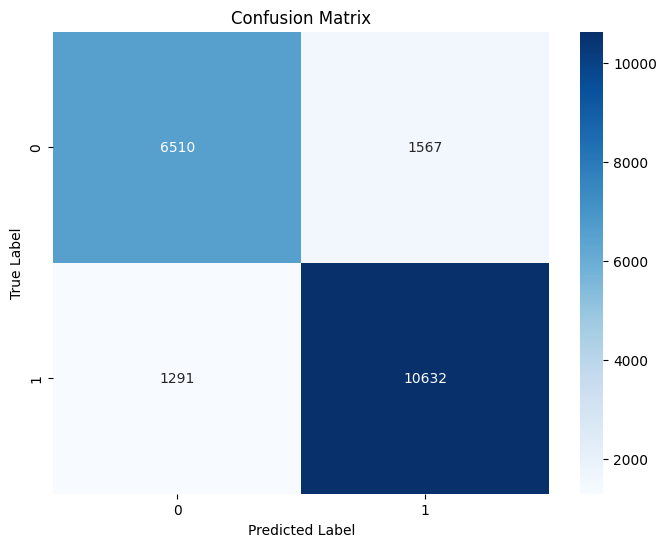

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

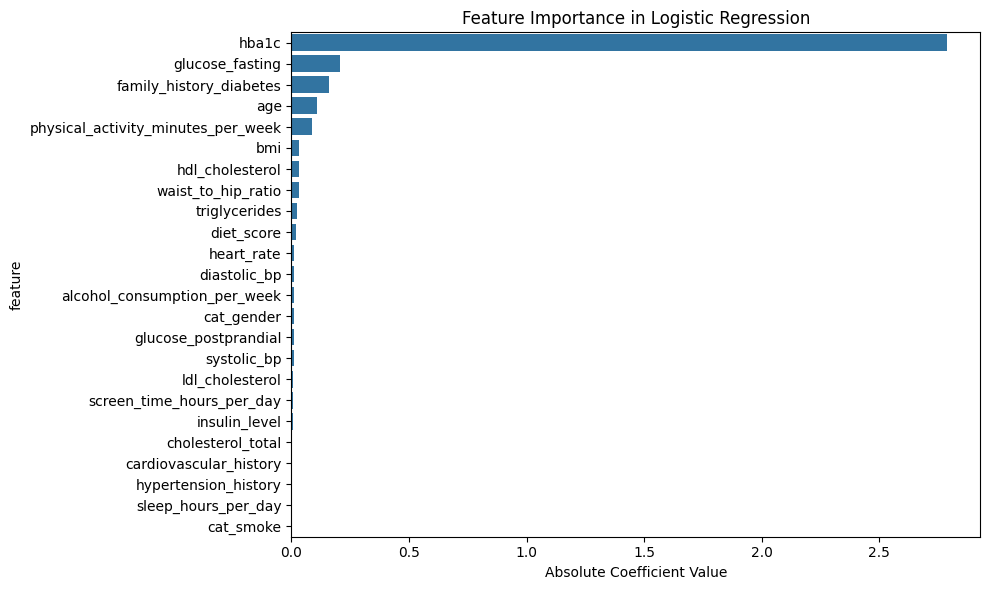

In [73]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()